rowid  colid
0      2        11.576622
       3        12.369224
       11       13.705880
       12        7.746662
       13        3.418793
                  ...    
29     14       10.827167
       15       12.155775
       21       10.979897
       28        7.681368
       29       12.295084
Name: aveSpeed, Length: 409, dtype: float64
变量参数： [[0.13697351 0.3000756  0.38296712]] 常数项： 1.3765012529602858 R方： 0.5570414284811875


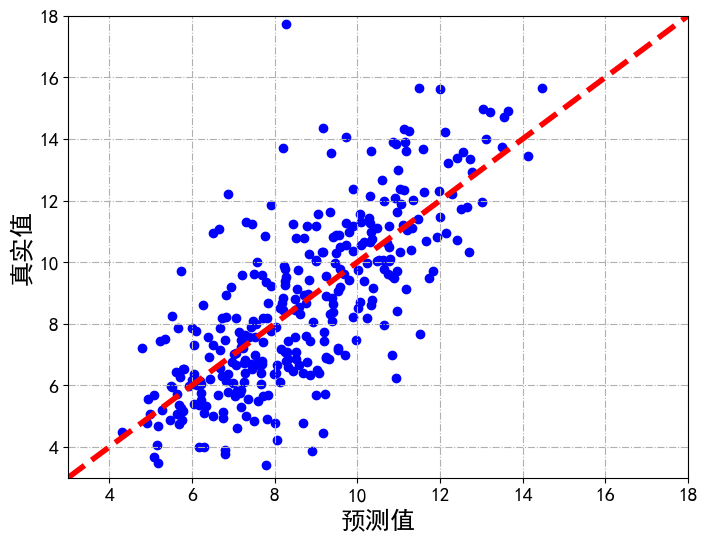

In [1]:
import pandas as pd    
from sklearn.linear_model import LinearRegression    
import matplotlib.pyplot as plt    
raw = pd.read_csv("DATASET-B.csv")      # 读入数据  
feature = raw[(raw.rowid<30) & (raw.colid<30) & (raw.date==20161101)]     # 筛选数据  
s1 = feature[feature.time_id==47].set_index(['rowid', 'colid']).aveSpeed  # 时间网格为47的车速    
s2 = feature[feature.time_id==48].set_index(['rowid', 'colid']).aveSpeed  # 时间网格为48的车速    
s3 = feature[feature.time_id==49].set_index(['rowid', 'colid']).aveSpeed  # 时间网格为49的车速    
s4 = feature[feature.time_id==50].set_index(['rowid', 'colid']).aveSpeed  # 时间网格为50的车速    
print(s4) #获取表格数据

data = pd.DataFrame(pd.concat((s1,s2,s3,s4), axis=1).values).dropna().reset_index(drop=True) # 拼接    
data.columns=['47','48','49','50'] # 修改列名    
X = data[['47', '48', '49']].values        
y = data['50'].values.reshape(-1, 1)        
reg = LinearRegression()     # 初始化        
reg.fit(X, y)     # 拟合数据        
coef = reg.coef_            # 自变量参数        
cons = reg.intercept_[0]      # 常数项        
print('变量参数：', coef, '常数项：', cons, 'R方：', reg.score(X, y))   
plt.rcParams['font.sans-serif']=['SimHei'] #设置中文字体    
plt.figure(figsize=(8, 6))     
plt.scatter(reg.predict(X), y, color='b')        
plt.plot([3, 18], [3, 18], "--", color='r', linewidth=4)  
plt.xlim(3, 18)  
plt.ylim(3, 18)  
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)    
plt.grid(linestyle='-.')    
plt.xlabel('预测值', fontsize=18)        
plt.ylabel('真实值', fontsize=18)  
plt.show() 


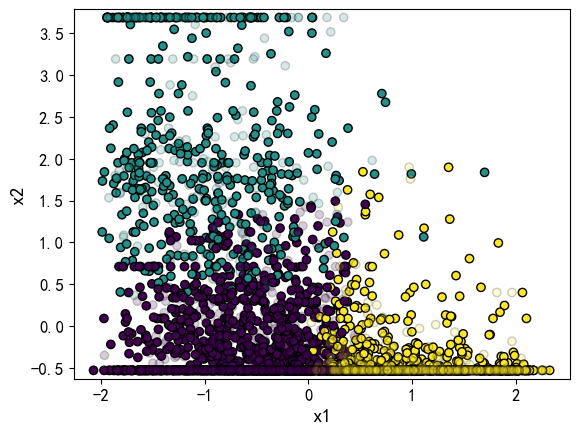

In [2]:
import numpy as np      
import pandas as pd    
import matplotlib
import matplotlib.pyplot as plt      
from sklearn.datasets import make_blobs      
from sklearn.preprocessing import StandardScaler      
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LogisticRegression      
# 获取数据  
raw = pd.read_csv("DATASET-B.csv")    
input_data = raw[raw.date==20161101][['aveSpeed', 'stopNum', 'labels']]    
input_data.columns = ['平均速度', '停车次数', '拥堵程度']    
# 获取特征  
input = input_data.values    
X = input[:, :-1]    
y = input[:, -1]    

# print(X)
# print(y[3])  #读取表格数据

 # 对特征进行标准化      
nor_X = StandardScaler().fit_transform(X)        
X1_min, X1_max = nor_X[:,0].min(), nor_X[:,0].max()        
X2_min, X2_max = nor_X[:,1].min(), nor_X[:,1].max()         
# 划分训练集和测试集，比例 7:3      
X_train, X_test, y_train, y_test=train_test_split(nor_X, y, test_size=0.3, random_state=1)        
# 随机抽取训练集和测试集中的一些样本作图，较浅的点是测试集      
train_plot_n = 3000      
test_plot_n = 1000      
train_sample_plot_idx = np.random.choice (X_train.shape[0], size=train_plot_n, replace=False)      
test_sample_plot_idx = np.random.choice (X_test.shape[0], size=test_plot_n, replace=False)      

matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False #这三行用于解决负号不显示的问题

plt.scatter(X_train[train_sample_plot_idx][:,0],      
            X_train[train_sample_plot_idx][:,1],      
            c=y_train[train_sample_plot_idx],      
            edgecolors='k')        
plt.scatter(X_test[test_sample_plot_idx][:,0],      
            X_test[test_sample_plot_idx][:,1],      
            c=y_test[test_sample_plot_idx],      
            alpha=0.2, edgecolors='k')       
plt.xlabel('x1', fontsize=14)        
plt.ylabel('x2', fontsize=14)      
plt.xticks(fontsize=12)      
plt.yticks(fontsize=12)      
plt.xlim(X1_min-0.1, X1_max+0.1)        
plt.ylim(X2_min-0.1, X2_max+0.1)        
# plt.xlim(-1.5, 2)        
# plt.ylim(-0.5, 2.5)        
plt.savefig('./fig1.png', dpi=600)       
plt.show()   
# 训练LR模型      


(500, 500)
(500, 500)
(250000, 2)


D:\Anaconda3\envs\Python37\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


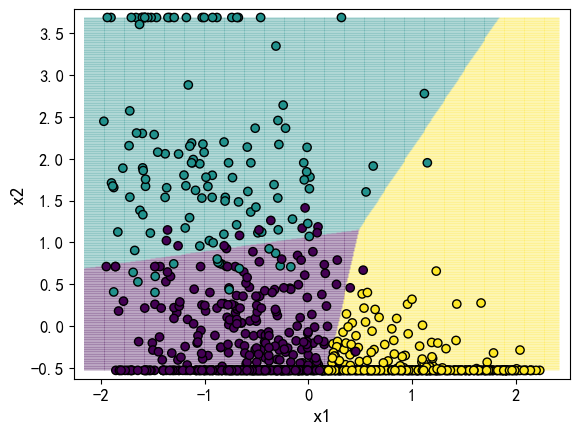

Train accuracy:93.58%
Test accuracy:93.55%


In [7]:
logreg = LogisticRegression()        
logreg.fit(X_train, y_train)    
# 在 X1, X2 的范围内画一个 500*500 的方格，预测每个点的 label  
N,M = 500,500    
X1_min, X1_max = nor_X[:,0].min(), nor_X[:,0].max()    
X2_min, X2_max = nor_X[:,1].min(), nor_X[:,1].max()     
t1 = np.linspace(X1_min, X1_max, N)    
t2 = np.linspace(X2_min, X2_max, M)    
x1, x2 = np.meshgrid(t1,t2)  
print(x1.shape)
print(x2.shape)
x_star= np.stack((x1.flat, x2.flat),axis=1) 
print(x_star.shape)
y_star= logreg.predict(x_star)    
# 随机选取 sample_plot_n 个样本点  
sample_plot_n = 1000  
sample_plot_idx = np.random.choice(nor_X.shape[0], size=sample_plot_n, replace=False)  
plt.pcolormesh(x1,x2,y_star.reshape(x1.shape),alpha=0.1)    
plt.scatter(nor_X[sample_plot_idx][:,0],nor_X[sample_plot_idx][:,1],  
            c=y[sample_plot_idx]  
            ,edgecolors='k')    
plt.xlabel('x1', fontsize=14)    
plt.ylabel('x2', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.xlim(X1_min-0.1, X1_max+0.1)    
plt.ylim(X2_min-0.1, X2_max+0.1)    
# plt.grid()    
plt.savefig('./fig2.png', dpi=600)  
plt.show()   
# 预测，计算准确率  
y_train_hat = logreg.predict(X_train)    
y_train = y_train.reshape(-1)    
result = y_train_hat == y_train    
c = np.count_nonzero(result)    
print('Train accuracy:%.2f%%'%(100*float(c)/float(len(result))))    
y_hat = logreg.predict(X_test)    
y_test = y_test.reshape(-1)    
result = y_hat == y_test    
c = np.count_nonzero(result)    
print('Test accuracy:%.2f%%'%(100*float(c)/float(len(result))))   

In [ ]:
from sklearn import datasets            
import matplotlib.pyplot as plt              
X,y = datasets.make_regression(n_samples=100,n_features=1,          
    n_informative=1,noise=2, random_state=9)    
plt.figure(figsize=(8, 6))    
plt.scatter(X,y, color='b')    
#调整绘图的样式     
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)    
plt.xlabel("x", fontsize=20)  
plt.ylabel("y", fontsize=20)    
plt.grid(linestyle='-.')    
ax = plt.gca()    
ax.xaxis.set_label_coords(1.02, 0.04)    
ax.yaxis.set_label_coords(-0.04, 1)    
#生成散点图    
plt.show()   